In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pickle
import json

1. Problem Statement
2. Data Gathering

In [3]:
df = pd.read_csv('medical_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


3. EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [6]:
df['sex'].replace({'female':0,'male':1},inplace=True)

C:\Users\shrey\AppData\Local\Temp\ipykernel_22316\3929232733.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sex'].replace({'female':0,'male':1},inplace=True)
C:\Users\shrey\AppData\Local\Temp\ipykernel_22316\3929232733.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sex'].replace({'

In [7]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [8]:
df['smoker'].replace({'no':1,'yes':0},inplace=True)

C:\Users\shrey\AppData\Local\Temp\ipykernel_22316\2069197016.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['smoker'].replace({'no':1,'yes':0},inplace=True)
C:\Users\shrey\AppData\Local\Temp\ipykernel_22316\2069197016.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['smoker'].replace({

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 73.3+ KB


In [10]:
df['region'].value_counts().to_dict()

{'southeast': 364, 'southwest': 325, 'northwest': 325, 'northeast': 324}

In [11]:
df = pd.get_dummies(df,columns=['region'],dtype=int)
df

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,0,16884.92400,0,0,0,1
1,18,1,33.770,1,1,1725.55230,0,0,1,0
2,28,1,33.000,3,1,4449.46200,0,0,1,0
3,33,1,22.705,0,1,21984.47061,0,1,0,0
4,32,1,28.880,0,1,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,1,10600.54830,0,1,0,0
1334,18,0,31.920,0,1,2205.98080,1,0,0,0
1335,18,0,36.850,0,1,1629.83350,0,0,1,0
1336,21,0,25.800,0,1,2007.94500,0,0,0,1


<Axes: >

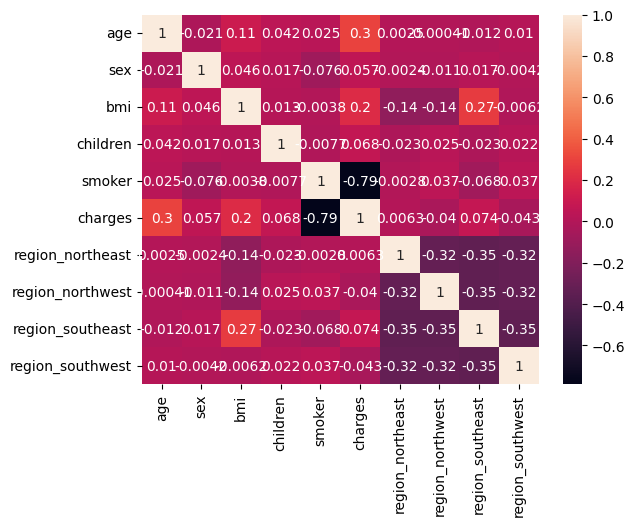

In [12]:
sns.heatmap(df.corr(),annot=True)

In [13]:
vif_list = []

for i in range(df.shape[1]-1):
    # print(i)
    vif = variance_inflation_factor(df.to_numpy(),i)
    print(f'VIF of {df.columns[i]} >>',vif)
    vif_list.append(vif)

VIF of age >> 1.3733477554905913
VIF of sex >> 1.0090182489428527
VIF of bmi >> 1.2237565363657417
VIF of children >> 1.0130054345040107
VIF of smoker >> 3.549468029485348
VIF of charges >> 4.014662101600524
VIF of region_northeast >> 10.365895266672188
VIF of region_northwest >> 10.434555470312631
VIF of region_southeast >> 13.183212089470675


4. Feature Engineeering

In [14]:
'''
1. If null values present then we need to fill them
2. Also we need to deal with outliers
'''

'\n1. If null values present then we need to fill them\n2. Also we need to deal with outliers\n'

5. Feature Selection

In [15]:
'''
1. Filter method
2. Wrapper Method
3. Embedded Method
'''

'\n1. Filter method\n2. Wrapper Method\n3. Embedded Method\n'

6. Model Training

A] Train Test Split

In [16]:
df = df.select_dtypes(exclude=object)
x = df.drop('charges',axis=1)
y = df['charges']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [17]:
x_train

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
560,46,0,19.950,2,1,0,1,0,0
1285,47,0,24.320,0,1,1,0,0,0
1142,52,0,24.860,0,1,0,0,1,0
969,39,0,34.320,5,1,0,0,1,0
486,54,0,21.470,3,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1095,18,0,31.350,4,1,1,0,0,0
1130,39,0,23.870,5,1,0,0,1,0
1294,58,1,25.175,0,1,1,0,0,0
860,37,0,47.600,2,0,0,0,0,1


In [18]:
x_train.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

B] Model Evaluation

In [19]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [20]:
# Testing Model
ypred = model.predict(x_test)

mse = mean_squared_error(y_test,ypred)          #Scale Variant
print('Mean squared Error:',mse)
print('*'*80)

rmse = np.sqrt(mse)                             #Scale Variant
print('Root Mean squared Error:',rmse)
print('*'*80)

mae = mean_absolute_error(y_test,ypred)         #Scale Variant
print('MAE:',mae)
print('*'*80)

r2score = r2_score(y_test,ypred)
print('R2 score:',r2score)

Mean squared Error: 33596915.85136146
********************************************************************************
Root Mean squared Error: 5796.2846592762735
********************************************************************************
MAE: 4181.1944737536405
********************************************************************************
R2 score: 0.7835929767120723


In [21]:
# Training Model
y_pred_train = model.predict(x_train)

mse = mean_squared_error(y_train,y_pred_train)          #Scale Variant
print('Mean squared Error:',mse)
print('*'*80)

rmse = np.sqrt(mse)                             #Scale Variant
print('Root Mean squared Error:',rmse)
print('*'*80)

mae = mean_absolute_error(y_train,y_pred_train)         #Scale Variant
print('MAE:',mae)
print('*'*80)

r2score = r2_score(y_train,y_pred_train)
print('R2 score:',r2score)

Mean squared Error: 37277681.70201866
********************************************************************************
Root Mean squared Error: 6105.545160099847
********************************************************************************
MAE: 4208.234572492217
********************************************************************************
R2 score: 0.7417255854683333


In [22]:
import pickle
with open('Insurance.pkl','wb') as f:
    pickle.dump(model,f)

In [23]:
x_train.head(1).T

,560
age,46.00
sex,0.00
bmi,19.95
children,2.00
smoker,1.00
region_northeast,0.00
region_northwest,1.00
region_southeast,0.00
region_southwest,0.00


In [33]:
age	= 46.00
sex	= 'female'
bmi	= 19.95
children = 2.00
smoker = 'no'
region = 'southwest'

# For testing model on single row:
1. Create an array with number of columns with zeroes
2. for object columns we will create label encoded dictionary

In [25]:
len(x_train.columns)

9

In [26]:
test_array = np.zeros(len(x_train.columns))
test_array

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [27]:
test_array[0] = age
test_array[2] = bmi
test_array[3] = children

In [28]:
test_array

array([46.  ,  0.  , 19.95,  2.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ])

In [4]:
label_encoded_data = {'sex':{'female':0,'male':1},
                      'smoker':{'no':1,'yes':1}}
label_encoded_data

{'sex': {'female': 0, 'male': 1}, 'smoker': {'no': 1, 'yes': 1}}

In [34]:
label_encoded_data['sex'][sex]

0

In [36]:
label_encoded_data['smoker'][smoker]

1

In [35]:
test_array[1] = label_encoded_data['sex'][sex]
test_array

array([46.  ,  0.  , 19.95,  2.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ])

In [37]:
test_array[4] = label_encoded_data['smoker'][smoker]
test_array

array([46.  ,  0.  , 19.95,  2.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ])

In [38]:
region = 'region_' + region
region

'region_southwest'

In [39]:
column_names = x.columns
column_names

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [42]:
region_index = np.where(column_names==region)[0][0]
region_index

8

In [43]:
test_array[region_index] = 1
test_array

array([46.  ,  0.  , 19.95,  2.  ,  1.  ,  0.  ,  0.  ,  0.  ,  1.  ])

In [46]:
model.predict([test_array])[0]

C:\Users\shrey\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


6655.418042152532

In [47]:
project_data = {'sex':{'female':0,'male':1},
                'smoker':{'no':1,'yes':1},
                'columns': list(x.columns)}
project_data

{'sex': {'female': 0, 'male': 1},
 'smoker': {'no': 1, 'yes': 1},
 'columns': ['age',
  'sex',
  'bmi',
  'children',
  'smoker',
  'region_northeast',
  'region_northwest',
  'region_southeast',
  'region_southwest']}

In [48]:
with open('project_data.json','w') as f:
    json.dump(project_data,f)